In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

x = pd.read_csv('data/credit card.csv')
x = x.drop('CUST_ID', axis=1)
x.fillna(method='ffill', inplace=True)
x.head()

C:\Users\Hyeonseok\AppData\Local\Temp\ipykernel_6440\3295066911.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x.fillna(method='ffill', inplace=True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

pca = PCA(n_components=2) #2차원으로 축소 선언
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']
x_principal.head()

,P1,P2
0,-0.489949,-0.679975
1,-0.519098,0.544833
2,0.330633,0.268877
3,-0.481656,-0.097606
4,-0.563512,-0.482506


In [8]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(x_principal) #모델 생성 및 훈련
labels = db_default.labels_ #각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파이 배열을 labels에 저장

colors = {}
colors[0] = 'y'
colors[1] = 'g'
colors[2] = 'b'
colors[-1] = 'k'

cvec = [colors[label] for label in labels] #각 데이터 포인트에 대한 색상 벡터 생성

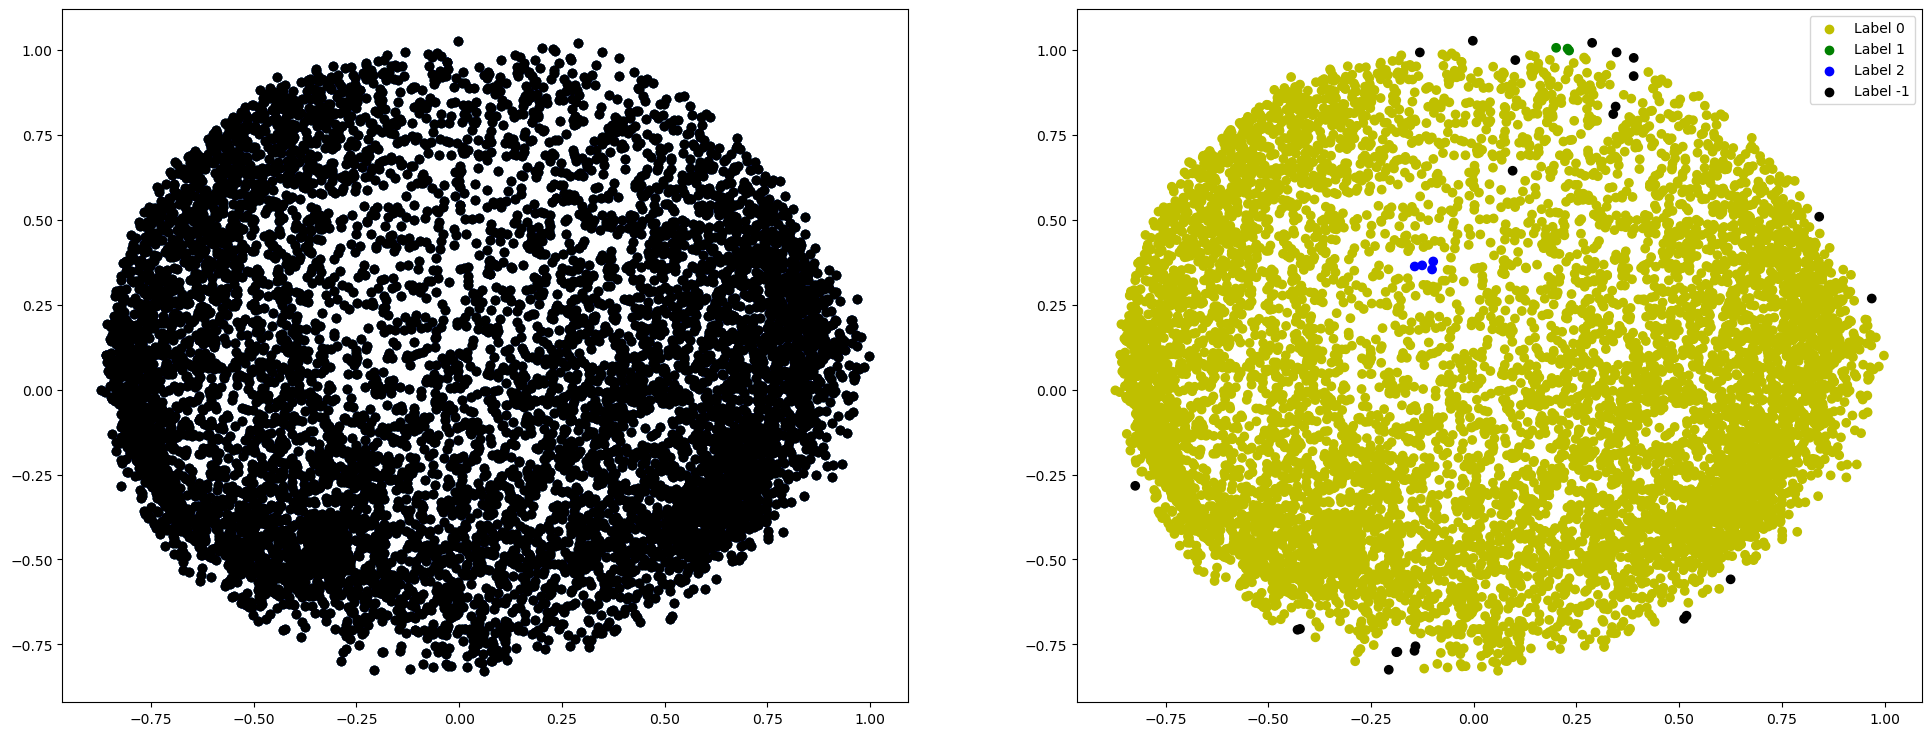

In [46]:
fig, axes = plt.subplots(1,2, figsize=(24,9))

r = axes[0].scatter(x_principal['P1'], x_principal['P2'], color='y')
g = axes[0].scatter(x_principal['P1'], x_principal['P2'], color='g')
b = axes[0].scatter(x_principal['P1'], x_principal['P2'], color='b')
k = axes[0].scatter(x_principal['P1'], x_principal['P2'], color='k')

axes[1].scatter(x_principal['P1'], x_principal['P2'], c=cvec)
axes[1].legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

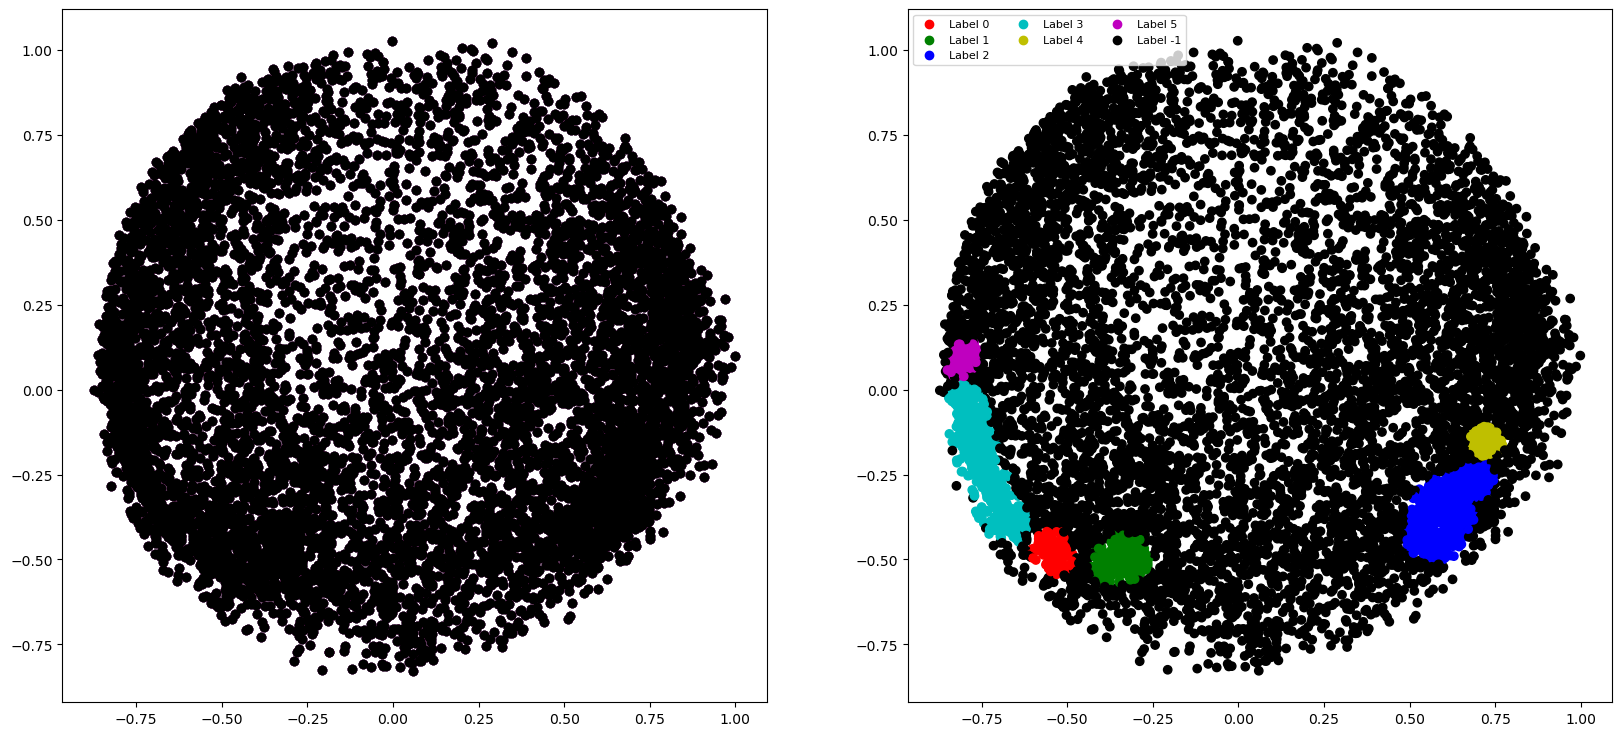

In [56]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(x_principal)
labels1 = db.labels_

colors1 = {}
colors1[0] = 'r'
colors1[1] = 'g'
colors1[2] = 'b'
colors1[3] = 'c'
colors1[4] = 'y'
colors1[5] = 'm'
colors1[-1] = 'k'

cvec = [colors1[label] for label in labels1]
colors2 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

fig, ax = plt.subplots(1,2,figsize=(20,9))
r = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[0])
g = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[1])
b = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[2])
c = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[3])
y = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[4])
m = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[5])
k = ax[0].scatter(x_principal['P1'], x_principal['P2'], marker = 'o', color=colors2[6])

ax[1].scatter(x_principal['P1'], x_principal['P2'], c=cvec)
ax[1].legend((r, g, b, c, y, m, k), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), scatterpoints=1, loc='upper left', ncol=3, fontsize = 8)
plt.show()

